In [67]:
from Scratch import metadata_loader
import numpy as np
from tqdm import tqdm

DEVICE = "ibm_torino"
LOGICAL = str(0)
XBASIS = True
ROUNDS = 50

state = "X" if XBASIS else "Z"
state += LOGICAL
print(f"state = {state}")


# Load the metadata
md = metadata_loader(True, True)
md = md[md["job_status"] == "JobStatus.DONE"]
md = md[md["code"] == "RepetitionCodeCircuit"]
md = md[md["descr"] == 'subset RepCodes']
md = md.dropna(subset=["rounds"])
md = md[md["meas_level"] == 1]
md['rounds'] = md['rounds'].astype(int)
md['distance'] = md['distance'].astype(int)

md = md[md["backend_name"] == DEVICE]
md = md[md["logical"] == LOGICAL]
md = md[md["xbasis"] == XBASIS]
md = md[md["rounds"] == ROUNDS]

# md = md[0:1]
print("shape:", md.shape)
md[:2]


state = X0
shape: (20, 18)


,creation_date,notebook_name,backend_name,job_id,tags,meas_level,shots,num_qubits,job_status,execution_date,code,distance,rounds,logical,descr,resets,xbasis,path_info
3742,2024-03-16 16:10:26.563000+01:00,Torino_RepCodes_jobs,ibm_torino,cqtvcrk4x0mg008acny0,"[Subset 56, 50 rounds, 0 log, xbasis=True]",1.0,1398.0,NaN,JobStatus.DONE,2024-03-16 18:39:13.713995+01:00,RepetitionCodeCircuit,56,50,0,subset RepCodes,NaN,True,"{'mean_gate_error': 0.006532027953773001, 'min..."
3741,2024-03-16 16:10:20.894000+01:00,Torino_RepCodes_jobs,ibm_torino,cqtvcq288ev000813ang,"[Subset 56, 50 rounds, 0 log, xbasis=True]",1.0,1398.0,NaN,JobStatus.DONE,2024-03-16 18:38:23.762412+01:00,RepetitionCodeCircuit,56,50,0,subset RepCodes,NaN,True,"{'mean_gate_error': 0.006532027953773001, 'min..."


In [68]:
from result_saver import SaverProvider

provider = SaverProvider()

In [69]:
md_loc = -1

job_id = md.iloc[md_loc]["job_id"]
job = provider.retrieve_job(job_id) 

execution_date = job.result().date
memory = job.result().get_memory()

print(f"Execution date: {execution_date}")

Execution date: 2024-03-16 18:19:17.076968+01:00


In [70]:
assert md_loc == -1
for id in range(-20, -1):
    job = provider.retrieve_job(md.iloc[id]["job_id"])
    memory = np.vstack([memory, job.result().get_memory()])

# Load calibration memory

In [71]:
from Scratch import load_calibration_memory

all_memories, gmm_dict, msmt_err_dict = load_calibration_memory(provider, tobecalib_backend=DEVICE, other_date=execution_date, post_process=True)

Found jobs for backend ibm_torino with closest execution date 2024-03-16 17:13:43.227995+00:00.


# Plot the subsets for each qubit

In [75]:
from soft_info import get_repcode_IQ_map, inv_qubit_mapping

# Get the layout of the last job (same as previous)
layout_des = job.deserialize_layout(job.initial_layouts()[0]) # only 1 layout
link_qubits = list(layout_des['link_qubit'].values())
code_qubits = list(layout_des['code_qubit'].values())

# Get the pSoft and countMat matrices
big_layout = link_qubits + code_qubits
inverted_q_map = inv_qubit_mapping(get_repcode_IQ_map(big_layout, synd_rounds=md.iloc[md_loc]["rounds"]))

In [76]:
QUBIT = 109

calib_mmr_0 = all_memories[QUBIT]['mmr_0']
calib_mmr_1 = all_memories[QUBIT]['mmr_1']

RepCode_mmr = memory[:, inverted_q_map[QUBIT]]

QUBIT = 109
State = X0


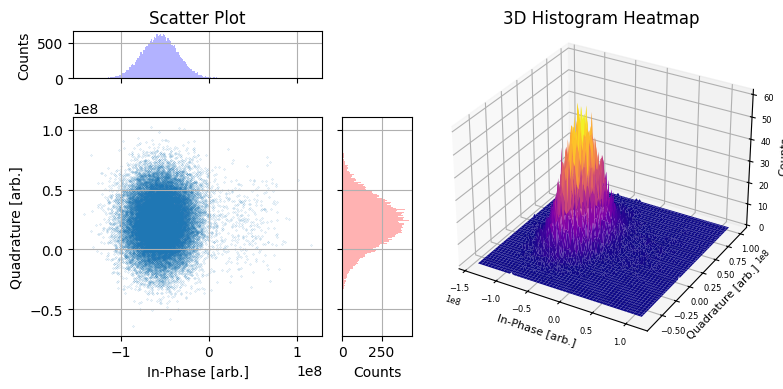

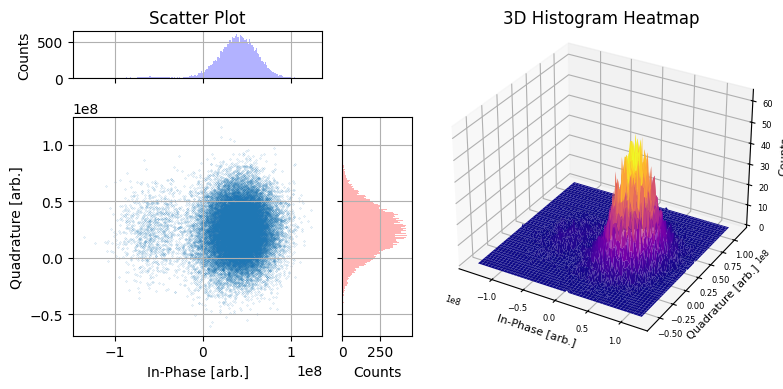

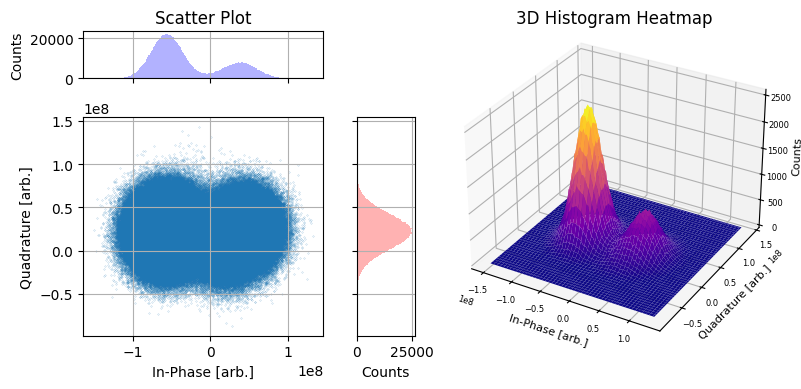

In [77]:
from soft_info import plot_IQ_data

print(f"QUBIT = {QUBIT}")
print(f"State = {state}")

plot_IQ_data(calib_mmr_0)
plot_IQ_data(calib_mmr_1)
plot_IQ_data(RepCode_mmr)